In [4]:
import pandas as pd
df=pd.read_csv("/content/Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df[df.duplicated(subset=['Loan_ID'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


TREATING MISSING VALUES

In [11]:
# Fill missing Married values with the most common value ("Yes")
married_mode = df['Married'].mode()[0]
df['Married'] = df['Married'].fillna(married_mode)

In [12]:
# 1. Find the most common number of dependents for each group
mode_married = df[df['Married'] == 'Yes']['Dependents'].mode()[0]
mode_single  = df[df['Married'] == 'No']['Dependents'].mode()[0]

# 2. Fill missing values for Married applicants
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'Yes'), 'Dependents'] = mode_married

# 3. Fill missing values for Single applicants
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'No'), 'Dependents'] = mode_single

In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [15]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


TRANSFORMATION

In [16]:
# Convert Binary Categorical to 0 and 1
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [18]:
print(df['Dependents'].unique())
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
print(df['Dependents'].unique())


['0' '1' '2' '3+']
[0 1 2 3]


In [19]:
# One-Hot Encoding for Property_Area
df = pd.get_dummies(df, columns=['Property_Area'])

In [23]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,LP001002,1,0,0,1,0,128.0,360.0,1.0,1,False,False,True,5849.0
1,LP001003,1,1,1,1,0,128.0,360.0,1.0,0,True,False,False,6091.0
2,LP001005,1,1,0,1,1,66.0,360.0,1.0,1,False,False,True,3000.0
3,LP001006,1,1,0,0,0,120.0,360.0,1.0,1,False,False,True,4941.0
4,LP001008,1,0,0,1,0,141.0,360.0,1.0,1,False,False,True,6000.0


In [27]:
#df['Loan_Status'].value_counts()
# Create TotalIncome and drop the original two columns
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1,0,0,1,0,128.0,360.0,1.0,1,False,False,True,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,0,True,False,False,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,1,False,False,True,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,1,False,False,True,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,1,False,False,True,6000.0
5,1,1,2,1,1,267.0,360.0,1.0,1,False,False,True,9613.0
6,1,1,0,0,0,95.0,360.0,1.0,1,False,False,True,3849.0
7,1,1,3,1,0,158.0,360.0,0.0,0,False,True,False,5540.0
8,1,1,2,1,0,168.0,360.0,1.0,1,False,False,True,5532.0
9,1,1,1,1,0,349.0,360.0,1.0,0,False,True,False,23809.0


CORRELATION & HEATMAP

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Drop the ID column as it's not needed for the model or correlation
df = df.drop('Loan_ID', axis=1, errors='ignore')

# Now run correlation
corr = df.corr()



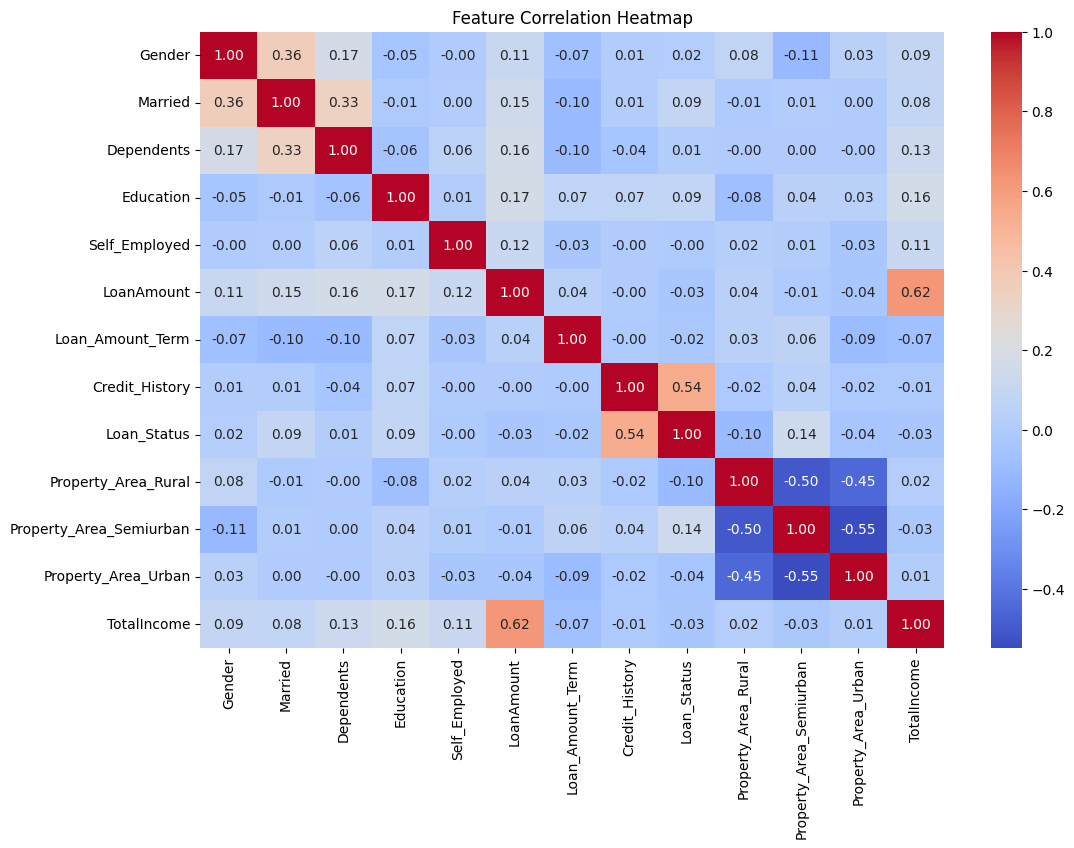

In [26]:
# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
# List of columns you want to remove
cols_to_drop = ['Loan_ID', 'Gender', 'Self_Employed']

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Verify that they are gone
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['Married', 'Dependents', 'Education', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome']


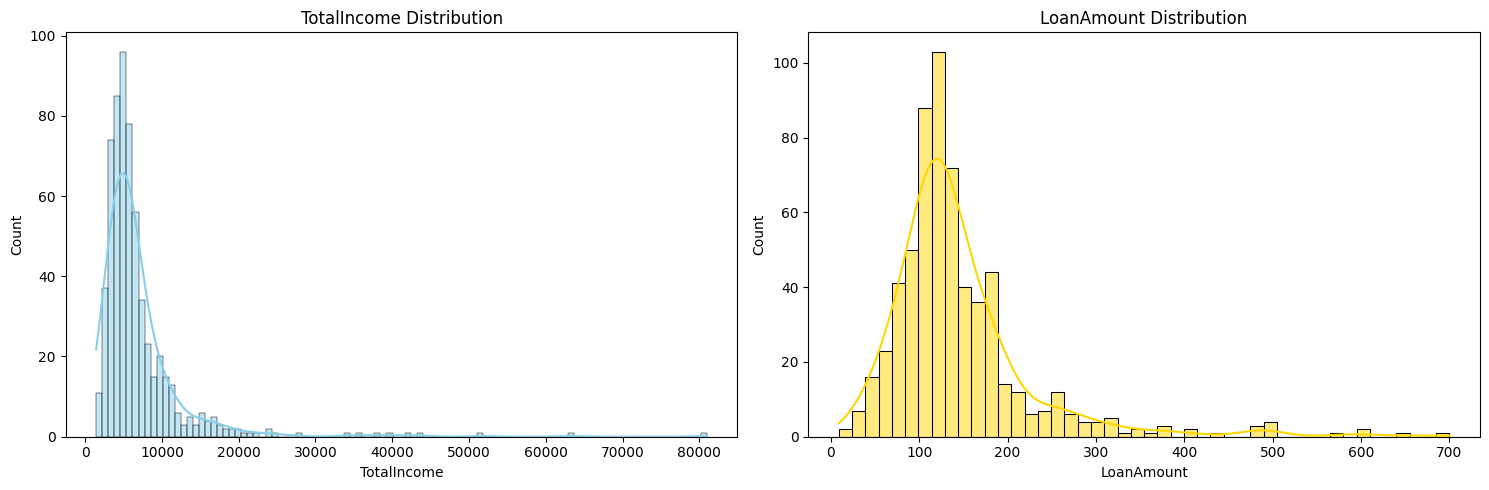

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Left Plot: TotalIncome (Skyblue)
sns.histplot(df['TotalIncome'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('TotalIncome Distribution')

# 2. Right Plot: LoanAmount (Yellow)
sns.histplot(df['LoanAmount'], kde=True, ax=axes[1], color='gold') # 'gold' or 'yellow'
axes[1].set_title('LoanAmount Distribution')

plt.tight_layout()
plt.show()

In [41]:

#DATA SKEWED THEREFORE WE USE LOG TRANSFORMATION
import numpy as np
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])

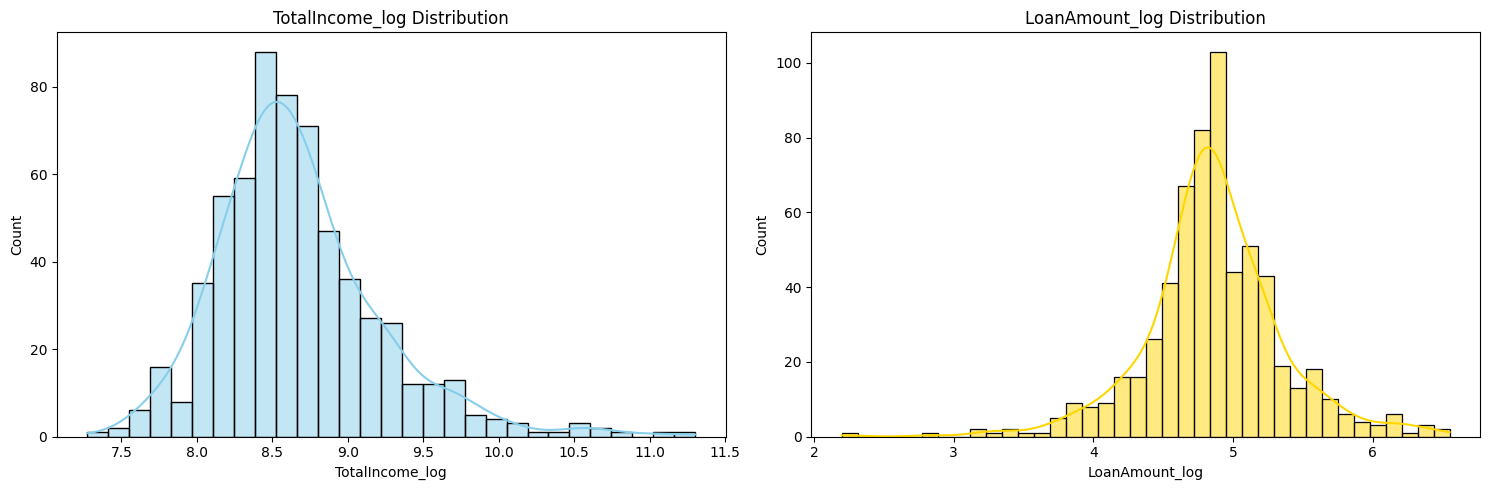

In [42]:
# Set up the figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Left Plot: TotalIncome (Skyblue)
sns.histplot(df['TotalIncome_log'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('TotalIncome_log Distribution')

# 2. Right Plot: LoanAmount (Yellow)
sns.histplot(df['LoanAmount_log'], kde=True, ax=axes[1], color='gold') # 'gold' or 'yellow'
axes[1].set_title('LoanAmount_log Distribution')

plt.tight_layout()
plt.show()

In [43]:
df.head(5)

,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncome_log,LoanAmount_log
0,0,0,1,128.0,360.0,1.0,1,False,False,True,5849.0,8.674026,4.852030
1,1,1,1,128.0,360.0,1.0,0,True,False,False,6091.0,8.714568,4.852030
2,1,0,1,66.0,360.0,1.0,1,False,False,True,3000.0,8.006368,4.189655
3,1,0,0,120.0,360.0,1.0,1,False,False,True,4941.0,8.505323,4.787492
4,0,0,1,141.0,360.0,1.0,1,False,False,True,6000.0,8.699515,4.948760


MODEL TRAING AND TESTING

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)
print("Features being used:", X.columns.tolist())

Features being used: ['Married', 'Dependents', 'Education', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome', 'TotalIncome_log', 'LoanAmount_log']


In [64]:
#Split TRAIN-TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shapes: {X_train.shape}, {y_train.shape}")
print(f"Testing shapes: {X_test.shape}, {y_test.shape}")

Training shapes: (491, 12), (491,)
Testing shapes: (123, 12), (123,)


In [119]:
dtree = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    #class_weight='balanced', # <--- Add this here
    random_state=42
)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [120]:
# Make predictions
predictions = dtree.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"The model accuracy is: {accuracy:.2%}")

The model accuracy is: 78.05%


In [92]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

print("\nDetailed Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[17 26]
 [ 1 79]]

Detailed Report:
              precision    recall  f1-score   support

           0       0.94      0.40      0.56        43
           1       0.75      0.99      0.85        80

    accuracy                           0.78       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.78      0.75       123



BAGGING

In [116]:
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier(max_depth=3, criterion='entropy', class_weight='balanced', random_state=42)
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=500, # 100 trees voting
                                  random_state=42)

In [117]:
# Train the committee
bagging_model.fit(X_train, y_train)

# Predict on the TEST data
bagging_predictions = bagging_model.predict(X_test)

In [118]:
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_predictions):.2%}")
print("New Confusion Matrix:")
print(confusion_matrix(y_test, bagging_predictions))

Bagging Accuracy: 77.24%
New Confusion Matrix:
[[20 23]
 [ 5 75]]
